# Question 2
With your own computing experience, develop a front end to R that allows the user

- to input the values of a univariate discrete random variable and the associated probabilities and to obtain the mean and variance, and
- to input the values of a bivariate discrete random variable and the associated probabilities and to obtain the marginal and conditional distributions.

Your program should provide a facility to calculate the mean and variance of each distribution, and to plot the pdf and cdf. In each program, do validity checks that the probabilities are in the interval [0, 1], and that they sum to one.



-----------------------------------------


Choose an option:
1. Univariate Discrete Random Variable
2. Bivariate Discrete Random Variable
3. EXIT


Enter option:  1




-----------------------------------------



Enter the VALUES (comma separated):  1,2,3,4,5,6,7,8,9,10

Enter the PROBABILITIES (comma separated, in decimal or percentage):  0.1,0.05,0.3,0.1,0.05,0.0225,0.05,0.05,0.075,0.2


Invalid probabilities. Ensure they are in the interval [0, 1] and sum to 1.


-----------------------------------------


Choose an option:
1. Univariate Discrete Random Variable
2. Bivariate Discrete Random Variable
3. EXIT


Enter option:  1




-----------------------------------------



Enter the VALUES (comma separated):  1,2,3,4,5,6,7,8,9,10

Enter the PROBABILITIES (comma separated, in decimal or percentage):  0.1,0.05,0.3,10%,0.05,2.5%,0.05,0.05,7.5%,20%




-----------------------------------------
Mean: 5.324999999999999
Variance: 10.119375000000002


-----------------------------------------


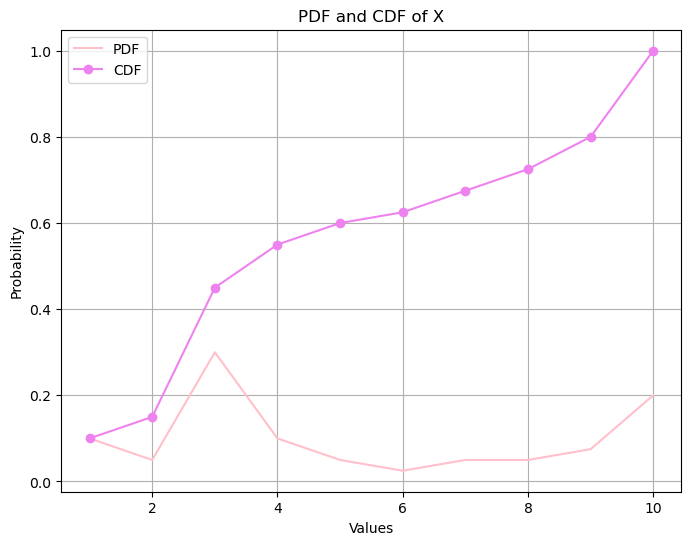



-----------------------------------------


Choose an option:
1. Univariate Discrete Random Variable
2. Bivariate Discrete Random Variable
3. EXIT


Enter option:  2




-----------------------------------------



Enter the VALUES OF X (comma separated):  1,2,3

Enter the VALUES OF Y (comma separated):  1,2,3


Enter the PROBABILITIES in decimal form, rows: P(X and Y=y) columns: P(X=x and Y) : 


Input a Probability:  0.52
Input a Probability:  0.20
Input a Probability:  0.04
Input a Probability:  0.14
Input a Probability:  0.02
Input a Probability:  0.01
Input a Probability:  0.06
Input a Probability:  0.01
Input a Probability:  0.00




-----------------------------------------

Joint Distribution of X and Y
      1     2     3
1  0.52  0.20  0.04
2  0.14  0.02  0.01
3  0.06  0.01  0.00


-----------------------------------------

Marginal Distribution X: [0.76 0.17 0.07]
Marginal Distribution Y: [0.72 0.23 0.05]


-----------------------------------------

Conditional Distributions in X (P(X|Y=y)
          1         2    3
1  0.722222  0.869565  0.8
2  0.194444  0.086957  0.2
3  0.083333  0.043478  0.0

Conditional Distributions in Y (P(Y|X=x)
          1         2         3
1  0.684211  0.263158  0.052632
2  0.823529  0.117647  0.058824
3  0.857143  0.142857  0.000000


-----------------------------------------
Mean X: 1.31
Mean Y: 1.3300000000000003
Variance X: 0.3539
Variance Y: 0.3211


-----------------------------------------


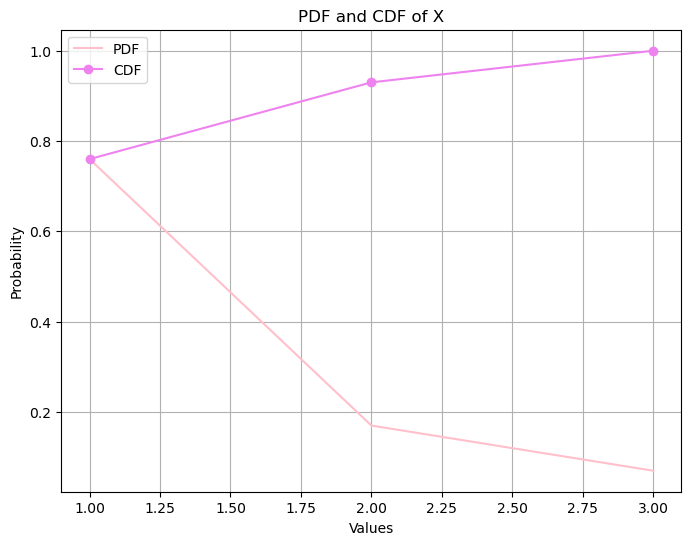

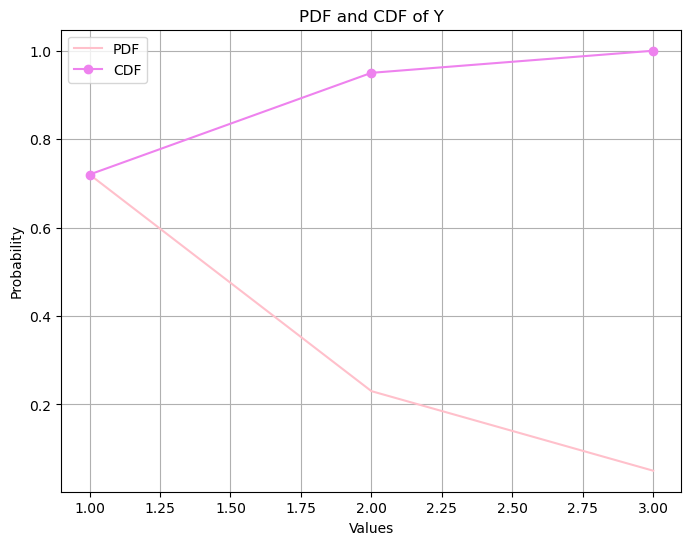



-----------------------------------------


Choose an option:
1. Univariate Discrete Random Variable
2. Bivariate Discrete Random Variable
3. EXIT


Enter option:  3




-----------------------------------------

Exiting the program...


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def check_probabilities(probabilities): # For UNIVARIATE
    if any(p < 0 or p > 1 for p in probabilities):
        return False
    if abs(sum(probabilities) - 1) > 1e-6:
        return False
    return True

def calculate_mean_variance(values, probabilities): # For UNIVARIATE
    mean = sum(v * p for v, p in zip(values, probabilities))
    variance = sum((v - mean) ** 2 * p for v, p in zip(values, probabilities))
    return mean, variance

def plot_pdf_cdf(values, probabilities,var):
    plt.figure(figsize=(8, 6))
    
    # PDF
    pdf_values = np.array(values)
    pdf_probabilities = np.array(probabilities)
    plt.plot(pdf_values, pdf_probabilities, color='pink', label='PDF')
    
    # CDF
    cdf_values = np.cumsum(probabilities)
    plt.plot(values, cdf_values, color='violet', marker='o', label='CDF')
    
    plt.xlabel('Values')
    plt.ylabel('Probability')
    plt.title(f'PDF and CDF of {var}')
    plt.legend()
    plt.grid(True)
    plt.show()

def bivar_mean_variance(values_x, values_y, probabilities):
    mean_x = mean_y = variance_x = variance_y = 0
    for i, x in enumerate(values_x):
        for j, y in enumerate(values_y):
            mean_x += x * probabilities[i][j]
            mean_y += y * probabilities[i][j]
            
    for i, x in enumerate(values_x):
        for j, y in enumerate(values_y):
            variance_x += ((x - mean_x)**2) * probabilities[i][j]
            variance_y += ((y - mean_y)**2) * probabilities[i][j]
    return mean_x, mean_y, variance_x, variance_y
    
def bivariate_marginal(values_x, values_y, probabilities):
    marginal_x = np.sum(probabilities, axis=1)
    marginal_y = np.sum(probabilities, axis=0)
    return marginal_x, marginal_y

def bivariate_conditional(values_x, values_y, probabilities):
    conditionals_x = probabilities / np.sum(probabilities, axis=0, keepdims=True)
    conditionals_y = probabilities / np.sum(probabilities, axis=1, keepdims=True)
    return conditionals_x, conditionals_y
    
def main():
    while True:
        print("\n\n-----------------------------------------")
        print("\n\nChoose an option:")
        print("1. Univariate Discrete Random Variable")
        print("2. Bivariate Discrete Random Variable")
        print("3. EXIT")
        option = int(input("Enter option: "))
        
        if option == 1:
            print("\n\n-----------------------------------------")
            values = list(map(float, input("\nEnter the VALUES (comma separated): ").split(',')))
            probabilities_input = input("\nEnter the PROBABILITIES (comma separated, in decimal or percentage): ").split(',')
            
            probabilities = []
            for prob in probabilities_input:
                if '%' in prob:
                    # Convert percentage to probability
                    prob = float(prob.replace('%', '')) / 100
                else:
                    prob = float(prob)
                
                probabilities.append(prob)
            
            if not check_probabilities(probabilities):
                print("Invalid probabilities. Ensure they are in the interval [0, 1] and sum to 1.")
                continue  # Continue to the beginning of the loop
            
            # Sort values and probabilities
            values, probabilities = zip(*sorted(zip(values, probabilities)))
            print("\n\n-----------------------------------------")
            mean, variance = calculate_mean_variance(values, probabilities)
            print(f"Mean: {mean}")
            print(f"Variance: {variance}")

            print("\n\n-----------------------------------------")
            plot_pdf_cdf(values, probabilities,"X")
            
        elif option == 2:
            print("\n\n-----------------------------------------")
            # test val: 1 2 3
            values_x = list(map(float, input("\nEnter the VALUES OF X (comma separated): ").split(',')))
            # test val: 1 2 3
            values_y = list(map(float, input("\nEnter the VALUES OF Y (comma separated): ").split(',')))
            # test val: (0.52,0.20,0.04,0.14,0.02,0.01,0.06,0.01,0.00)
            
            probabilities_input = np.array([])
            print(f"Enter the PROBABILITIES in decimal form, rows: P(X and Y=y) columns: P(X=x and Y) : ")
            for i in range(len(values_x)*len(values_y)):
                probabilities_input = np.append(probabilities_input, float(input(f"Input a Probability: ")))
                
            probabilities_matrix = probabilities_input.reshape(len(values_y), len(values_x))
            
            if not check_probabilities(probabilities_input):
                print("Invalid probabilities. Ensure they are in the interval [0, 1] and sum to 1.")
                continue  # Continue to the beginning of the loop

            print("\n\n-----------------------------------------")
            print("\nJoint Distribution of X and Y")
            print(pd.DataFrame(probabilities_matrix, columns=map(int, values_x), index=map(int, values_y)))
            
            print("\n\n-----------------------------------------")
            marginal_x, marginal_y = bivariate_marginal(values_x, values_y, probabilities_matrix)
            print(f"\nMarginal Distribution X: {marginal_x}")
            print(f"Marginal Distribution Y: {marginal_y}")
            
            print("\n\n-----------------------------------------")
            conditional_probabilities = bivariate_conditional(values_x, values_y, probabilities_matrix)
            print("\nConditional Distributions in X (P(X|Y=y)")

            print(pd.DataFrame(conditional_probabilities[0], columns=map(int, values_x), index=map(int, values_y)))
            
            print("\nConditional Distributions in Y (P(Y|X=x)")
            print(pd.DataFrame(conditional_probabilities[1],  columns=map(int, values_y), index=map(int, values_x)))

            print("\n\n-----------------------------------------")
            mean_x, mean_y, variance_x, variance_y = bivar_mean_variance(values_x, values_y, probabilities_matrix)
            print(f"Mean X: {mean_x}")
            print(f"Mean Y: {mean_y}")
            print(f"Variance X: {variance_x}")
            print(f"Variance Y: {variance_y}")

            print("\n\n-----------------------------------------")
            plot_pdf_cdf(values_x, marginal_x,"X")
            plot_pdf_cdf(values_y, marginal_y,"Y")
            
        elif option == 3:
            print("\n\n-----------------------------------------")
            print("\nExiting the program...")
            break  # Exit the loop and end the program
        
        else:
            print("Invalid option")

if __name__ == "__main__":
    main()


This is a program designed to compute and display the essential measures for BOTH __univariate__ and __bivariate__ discrete random distributions. These includes the mean, variance, and Probability Density Function (PDF) & Cumulative Density Function (CDF) plots. The bivariate distribution also comes with matrices showing their joint, marginal, and conditional distributions.

We implemented a looping logic in this program, allowing for an indefinite repetition of uses and also retries in the case that the inputs are invalid. Additionally, we also included data validation measures to ensure that all inputs are only accepted if they meet certain criteria (e.g. probability sums exactly to 1). Moreover, we also added another data validation feature which automatically converts probabilities in \'\%\' format into usable decimals. Lastly, we put in an exit feature which lets you terminate the program.

To calculate the needed statistical measures and graphs, we used the __numpy__, __pandas__, and __matplotlib__ modules. These allowed us to make easier calculations while also increasing the efficiency of both our code and program. Additionally, these modules also granted us the ability to create graphs which are readable and aesthetically pleasing.